In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from tensorflow import keras

In [2]:
data_train=pd.read_csv('House_Rent_Dataset.csv')
data_train.tail()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4745,2022-05-04,2,15000,1000,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


In [46]:
data_train.shape #there are 4745 rows and 12 columns 

(4746, 12)

In [3]:
#encoding the categorical data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [5]:
data_train['Bathroom']=label_encoder.fit_transform(data_train['Bathroom'])
data_train['Point of Contact']=label_encoder.fit_transform(data_train['Point of Contact'])

In [8]:
X = data_train.iloc[:,[1,3,10,11]].values
y = data_train.iloc[:, [2]].values

# ANN for Regression with 3 hidden layers

In [47]:
ann = keras.models.Sequential() #Generating ANN

In [48]:
ann.add(keras.layers.Dense(units=4, activation='relu')) #first hidden layer

In [49]:
ann.add(keras.layers.Dense(units=6, activation='relu'))# Second hidden layer 

In [59]:
ann.add(keras.layers.Dense(units=6, activation='relu')) #Third hidden Layer

In [60]:
ann.add(keras.layers.Dense(units=1)) #output layer (house rent price)

In [61]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['MeanSquaredLogarithmicError'])

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.2, shuffle=True)

In [80]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 200,validation_data=(X_val, y_val),
              shuffle=True)

Epoch 1/200
95/95 [==============================] - 1s 5ms/step - loss: 1558121472.0000 - mean_squared_logarithmic_error: 0.5161 - val_loss: 18480379904.0000 - val_mean_squared_logarithmic_error: 0.5210
Epoch 2/200
95/95 [==============================] - 0s 4ms/step - loss: 1572555264.0000 - mean_squared_logarithmic_error: 0.4991 - val_loss: 18458396672.0000 - val_mean_squared_logarithmic_error: 0.4559
Epoch 3/200
95/95 [==============================] - 0s 4ms/step - loss: 1548334592.0000 - mean_squared_logarithmic_error: 0.5048 - val_loss: 18466414592.0000 - val_mean_squared_logarithmic_error: 0.4013
Epoch 4/200
95/95 [==============================] - 0s 4ms/step - loss: 1554187520.0000 - mean_squared_logarithmic_error: 0.5240 - val_loss: 18306113536.0000 - val_mean_squared_logarithmic_error: 0.5359
Epoch 5/200
95/95 [==============================] - 0s 4ms/step - loss: 1553386624.0000 - mean_squared_logarithmic_error: 0.4783 - val_loss: 18490757120.0000 - val_mean_squared_logari

95/95 [==============================] - 0s 4ms/step - loss: 1533127552.0000 - mean_squared_logarithmic_error: 0.5006 - val_loss: 18979655680.0000 - val_mean_squared_logarithmic_error: 0.4034
Epoch 42/200
95/95 [==============================] - 0s 4ms/step - loss: 1555798912.0000 - mean_squared_logarithmic_error: 0.4882 - val_loss: 18616475648.0000 - val_mean_squared_logarithmic_error: 0.3866
Epoch 43/200
95/95 [==============================] - 0s 4ms/step - loss: 1551011712.0000 - mean_squared_logarithmic_error: 0.4606 - val_loss: 18621921280.0000 - val_mean_squared_logarithmic_error: 0.7559
Epoch 44/200
95/95 [==============================] - 0s 4ms/step - loss: 1546767488.0000 - mean_squared_logarithmic_error: 0.5619 - val_loss: 18536163328.0000 - val_mean_squared_logarithmic_error: 0.4476
Epoch 45/200
95/95 [==============================] - 0s 4ms/step - loss: 1552302336.0000 - mean_squared_logarithmic_error: 0.4990 - val_loss: 18677084160.0000 - val_mean_squared_logarithmic_er

95/95 [==============================] - 0s 4ms/step - loss: 1540587648.0000 - mean_squared_logarithmic_error: 0.5029 - val_loss: 18747011072.0000 - val_mean_squared_logarithmic_error: 0.4471
Epoch 82/200
95/95 [==============================] - 0s 4ms/step - loss: 1549076992.0000 - mean_squared_logarithmic_error: 0.5117 - val_loss: 18651521024.0000 - val_mean_squared_logarithmic_error: 0.3966
Epoch 83/200
95/95 [==============================] - 0s 4ms/step - loss: 1548893568.0000 - mean_squared_logarithmic_error: 0.4977 - val_loss: 18871799808.0000 - val_mean_squared_logarithmic_error: 0.4330
Epoch 84/200
95/95 [==============================] - 0s 4ms/step - loss: 1543098112.0000 - mean_squared_logarithmic_error: 0.4867 - val_loss: 18738317312.0000 - val_mean_squared_logarithmic_error: 0.4828
Epoch 85/200
95/95 [==============================] - 0s 4ms/step - loss: 1555400704.0000 - mean_squared_logarithmic_error: 0.4924 - val_loss: 18247804928.0000 - val_mean_squared_logarithmic_er

Epoch 121/200
95/95 [==============================] - 0s 4ms/step - loss: 1540973312.0000 - mean_squared_logarithmic_error: 0.4729 - val_loss: 18625933312.0000 - val_mean_squared_logarithmic_error: 0.5019
Epoch 122/200
95/95 [==============================] - 0s 4ms/step - loss: 1547925760.0000 - mean_squared_logarithmic_error: 0.4532 - val_loss: 18475683840.0000 - val_mean_squared_logarithmic_error: 0.5466
Epoch 123/200
95/95 [==============================] - 0s 5ms/step - loss: 1545413632.0000 - mean_squared_logarithmic_error: 0.5138 - val_loss: 18684102656.0000 - val_mean_squared_logarithmic_error: 0.4856
Epoch 124/200
95/95 [==============================] - 0s 5ms/step - loss: 1538477312.0000 - mean_squared_logarithmic_error: 0.4764 - val_loss: 18423681024.0000 - val_mean_squared_logarithmic_error: 0.4301
Epoch 125/200
95/95 [==============================] - 0s 4ms/step - loss: 1545479296.0000 - mean_squared_logarithmic_error: 0.4740 - val_loss: 18649800704.0000 - val_mean_squa

Epoch 161/200
95/95 [==============================] - 0s 4ms/step - loss: 1543387520.0000 - mean_squared_logarithmic_error: 0.5513 - val_loss: 18493224960.0000 - val_mean_squared_logarithmic_error: 0.6921
Epoch 162/200
95/95 [==============================] - 0s 4ms/step - loss: 1536615936.0000 - mean_squared_logarithmic_error: 0.4972 - val_loss: 18151772160.0000 - val_mean_squared_logarithmic_error: 0.4637
Epoch 163/200
95/95 [==============================] - 0s 4ms/step - loss: 1577877248.0000 - mean_squared_logarithmic_error: 0.5201 - val_loss: 18453499904.0000 - val_mean_squared_logarithmic_error: 0.4135
Epoch 164/200
95/95 [==============================] - 0s 4ms/step - loss: 1548442496.0000 - mean_squared_logarithmic_error: 0.5107 - val_loss: 18156218368.0000 - val_mean_squared_logarithmic_error: 0.4603
Epoch 165/200
95/95 [==============================] - 0s 4ms/step - loss: 1517922048.0000 - mean_squared_logarithmic_error: 0.4680 - val_loss: 18847291392.0000 - val_mean_squa

In [81]:
#Let's Predict the result
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 5146.91 12000.  ]
 [10426.16 30000.  ]
 [10628.91  8500.  ]
 ...
 [13232.63  7000.  ]
 [13335.59 10000.  ]
 [13236.94 10000.  ]]


In [82]:
# I use several metrics of regression model
import sklearn.metrics
evs_no=sklearn.metrics.explained_variance_score(y_test,ann.predict(X_test))
me_no=sklearn.metrics.max_error(y_test,ann.predict(X_test))
mae_no=sklearn.metrics.mean_absolute_error(y_test,ann.predict(X_test))
mse_no=sklearn.metrics.mean_squared_error(y_test,ann.predict(X_test))
msle_no=sklearn.metrics.mean_squared_log_error(y_test,ann.predict(X_test))
Mae_no=sklearn.metrics.median_absolute_error(y_test,ann.predict(X_test))
r2_no=sklearn.metrics.r2_score(y_test,ann.predict(X_test))
mpd_no=sklearn.metrics.mean_poisson_deviance(y_test,ann.predict(X_test))
mgd_no=sklearn.metrics.mean_gamma_deviance(y_test,ann.predict(X_test))
mtd_no=sklearn.metrics.mean_tweedie_deviance(y_test,ann.predict(X_test))

In [83]:
print('Explained Variance Score:',evs_no)
print('Max Error               :',me_no)
print('Mean Absolute Error     :',mae_no)
print('Mean Square Error       :',mse_no)
print('Mean Squared Log Error  :',msle_no)
print('Median Absolute Error   :',Mae_no)
print('R2 Score                :',r2_no)
print('Mean Poisson Deviance   :',mpd_no)
print('Mean Gamma Deviance     :',mgd_no)
print('Mean Tweedie Deviance   :',mtd_no)

Explained Variance Score: 0.5588366697163727
Max Error               : 355071.65625
Mean Absolute Error     : 17983.566578176396
Mean Square Error       : 1265888665.6027317
Mean Squared Log Error  : 0.4924112525338029
Median Absolute Error   : 7328.00927734375
R2 Score                : 0.5584827249398538
Mean Poisson Deviance   : 17018.73404362466
Mean Gamma Deviance     : 0.7100474811058369
Mean Tweedie Deviance   : 1265888665.6027317


dict_keys(['loss', 'mean_squared_logarithmic_error', 'val_loss', 'val_mean_squared_logarithmic_error'])


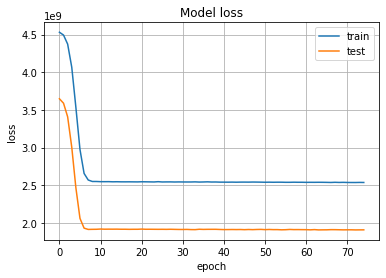

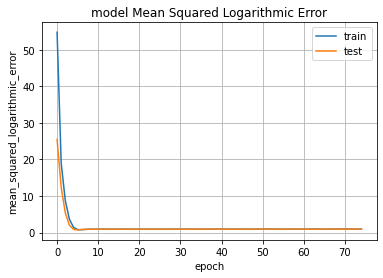

In [84]:
# list all data in history
print(model.history.keys())
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.grid()
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
# summarize history for loss
plt.plot(model.history['mean_squared_logarithmic_error'])
plt.plot(model.history['val_mean_squared_logarithmic_error'])
plt.grid()
plt.title('model Mean Squared Logarithmic Error')
plt.ylabel('mean_squared_logarithmic_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


# Decision Tree Regression

In [21]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

In [25]:
y_prediction= regressor.predict(X_test)

In [29]:
y_prediction, y_test

(array([ 16666.67,   8350.  ,   9359.49,   8836.84, 100000.  ,  13000.  ,
          9527.4 ,  16589.29,   9359.49,  11681.82,  19833.33,  15477.69,
         13528.57,  35450.  ,  13980.81,  15375.  ,  32488.64,  12500.  ,
         35000.  ,  18083.33,   9000.  ,  16181.78,  12625.  ,  65000.  ,
         10000.  ,  17500.  ,  15477.69,  14196.09,  15000.  ,   8836.84,
        320000.  ,  43875.09,   8925.  ,  14000.  ,  17685.71,  30500.  ,
         16206.52,  17733.33,  55548.78,  15477.69,  55548.78,  42000.  ,
         15500.  ,  50000.  ,  83906.25,  18000.  ,  83041.67,  11159.09,
         18764.71,  22111.11,  26000.  ,   9030.77,  23000.  ,   8563.16,
         22500.  ,   9036.96,   9527.4 ,  32488.64, 100000.  ,   8350.  ,
         14000.  ,  13980.81,  20260.  ,  10000.  ,  10423.08,  25880.95,
         38000.  ,   9500.  ,  65000.  ,  55359.26,  20000.  ,  14196.09,
         80000.  , 230000.  ,  64000.  ,  10800.  ,  78555.56,   8563.16,
         18416.67, 170000.  ,  50000. 

In [35]:
# I use several metrics of regression model
import sklearn.metrics
evs_no_=sklearn.metrics.explained_variance_score(y_test,y_prediction)
me_no_=sklearn.metrics.max_error(y_test,y_prediction)
mae_no_=sklearn.metrics.mean_absolute_error(y_test,y_prediction)
mse_no_=sklearn.metrics.mean_squared_error(y_test,y_prediction)
msle_no_=sklearn.metrics.mean_squared_log_error(y_test,y_prediction)
Mae_no_=sklearn.metrics.median_absolute_error(y_test,y_prediction)
r2_no_=sklearn.metrics.r2_score(y_test,y_prediction)
mpd_no_=sklearn.metrics.mean_poisson_deviance(y_test,y_prediction)
mgd_no_=sklearn.metrics.mean_gamma_deviance(y_test,y_prediction)
mtd_no_=sklearn.metrics.mean_tweedie_deviance(y_test,y_prediction)

In [36]:
print('Explained Variance Score:',evs_no_)
print('Max Error               :',me_no_)
print('Mean Absolute Error     :',mae_no_)
print('Mean Square Error       :',mse_no_)
print('Mean Squared Log Error  :',msle_no_)
print('Median Absolute Error   :',Mae_no_)
print('R2 Score                :',r2_no_)
print('Mean Poisson Deviance   :',mpd_no_)
print('Mean Gamma Deviance     :',mgd_no_)
print('Mean Tweedie Deviance   :',mtd_no_)

Explained Variance Score: 0.7351948932106738
Max Error               : 640833.3333333334
Mean Absolute Error     : 9596.18306348132
Mean Square Error       : 917402678.8558807
Mean Squared Log Error  : 0.21517361307359315
Median Absolute Error   : 2833.333333333332
R2 Score                : 0.7346903834449524
Mean Poisson Deviance   : 7743.189254962925
Mean Gamma Deviance     : 0.19973218640534257
Mean Tweedie Deviance   : 917402678.8558807


# Multiple Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_predict = model.predict(X_test)
y_predict

array([[-1.12e+04],
       [-7.25e+03],
       [-3.04e+03],
       [-4.32e+03],
       [ 1.62e+05],
       [-2.13e+04],
       [-7.42e+03],
       [ 3.30e+04],
       [-3.04e+03],
       [ 5.91e+03],
       [ 3.01e+04],
       [ 2.42e+04],
       [ 1.40e+04],
       [ 6.76e+04],
       [ 1.84e+04],
       [-2.07e+03],
       [ 2.28e+04],
       [ 2.74e+04],
       [ 6.78e+04],
       [ 4.28e+04],
       [ 2.55e+04],
       [ 3.01e+04],
       [ 3.59e+04],
       [ 9.35e+04],
       [-1.94e+04],
       [ 1.50e+04],
       [ 2.42e+04],
       [ 1.55e+04],
       [ 3.50e+04],
       [-4.32e+03],
       [ 1.62e+05],
       [ 5.45e+04],
       [-1.02e+04],
       [ 2.22e+04],
       [ 1.69e+04],
       [ 7.07e+04],
       [ 2.13e+04],
       [ 3.89e+04],
       [ 5.59e+04],
       [ 2.42e+04],
       [ 5.59e+04],
       [ 4.72e+04],
       [ 3.69e+04],
       [ 5.33e+04],
       [ 9.64e+04],
       [ 2.85e+04],
       [ 8.61e+04],
       [ 2.99e+03],
       [ 2.86e+04],
       [ 1.24e+04],


In [41]:
# I use several metrics of regression model
import sklearn.metrics
evs_no__=sklearn.metrics.explained_variance_score(y_test,y_predict)
me_no__=sklearn.metrics.max_error(y_test,y_predict)
mae_no__=sklearn.metrics.mean_absolute_error(y_test,y_predict)
mse_no__=sklearn.metrics.mean_squared_error(y_test,y_predict)
Mae_no__=sklearn.metrics.median_absolute_error(y_test,y_predict)
r2_no__=sklearn.metrics.r2_score(y_test,y_predict)

In [43]:
print('Explained Variance Score:',evs_no__)
print('Max Error               :',me_no__)
print('Mean Absolute Error     :',mae_no__)
print('Mean Square Error       :',mse_no__)
print('Median Absolute Error   :',Mae_no__)
print('R2 Score                :',r2_no__)

Explained Variance Score: 0.4540473940466384
Max Error               : 539110.864387077
Mean Absolute Error     : 24527.811005868152
Mean Square Error       : 1887827505.308446
Median Absolute Error   : 15347.43068861058
R2 Score                : 0.4540469489580178


# Findings